In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/Users/surajmathapati/Prep/Customer_churn_prediction/data/Bank Customer Churn Prediction.csv")

data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
categorical_columns = ['country', 'gender', 'credit_card', 'active_member', 'churn']
data_unique_counts = {col: data[col].nunique() for col in categorical_columns}
print(data_unique_counts)

{'country': 3, 'gender': 2, 'credit_card': 2, 'active_member': 2, 'churn': 2}


In [8]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

                  customer_id  credit_score       age    tenure   balance  \
customer_id          1.000000      0.005308  0.009497 -0.014883 -0.012419   
credit_score         0.005308      1.000000 -0.003965  0.000842  0.006268   
age                  0.009497     -0.003965  1.000000 -0.009997  0.028308   
tenure              -0.014883      0.000842 -0.009997  1.000000 -0.012254   
balance             -0.012419      0.006268  0.028308 -0.012254  1.000000   
products_number      0.016972      0.012238 -0.030680  0.013444 -0.304180   
credit_card         -0.014025     -0.005458 -0.011721  0.022583 -0.014858   
active_member        0.001665      0.025651  0.085472 -0.028362 -0.010084   
estimated_salary     0.015271     -0.001384 -0.007201  0.007784  0.012797   
churn               -0.006248     -0.027094  0.285323 -0.014001  0.118533   

                  products_number  credit_card  active_member  \
customer_id              0.016972    -0.014025       0.001665   
credit_score          

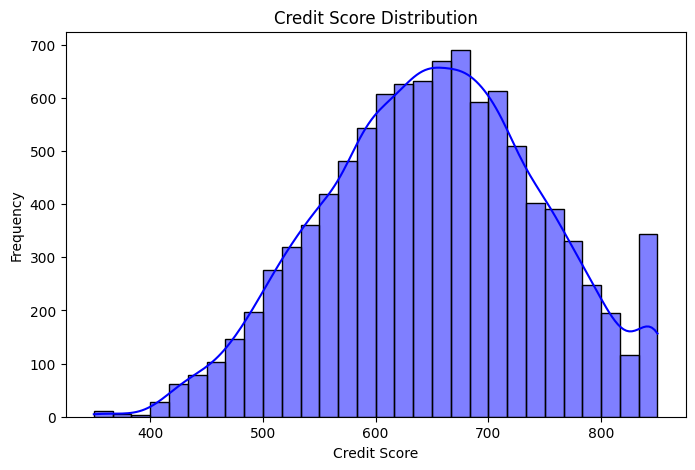

In [10]:
# Distribution of NUmeric Features

#Credit Score Distribution

plt.figure(figsize=(8,5))
sns.histplot(data["credit_score"], bins = 30, kde = True, color = 'blue')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

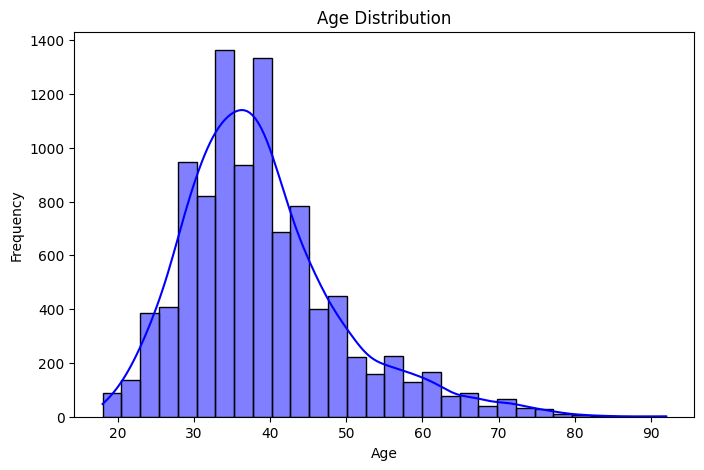

In [11]:
#Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(data["age"], bins = 30, kde = True, color = 'blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


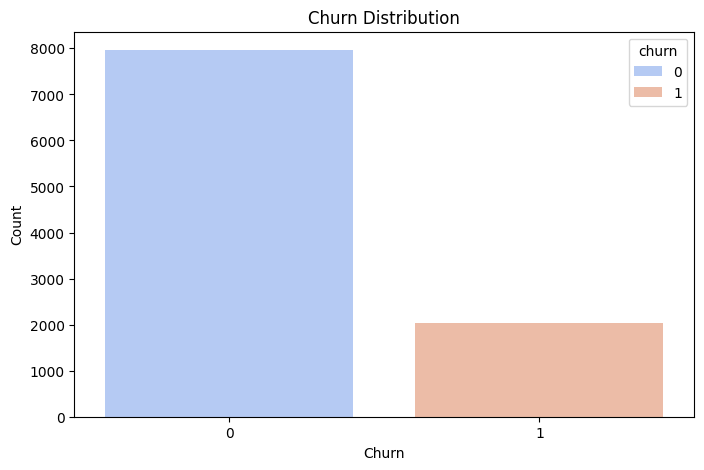

In [ ]:
#CHurn Distribition
plt.figure(figsize=(8,5))
sns.countplot(x='churn', hue='churn', data=data, palette="coolwarm")
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel("Count")
plt.show()

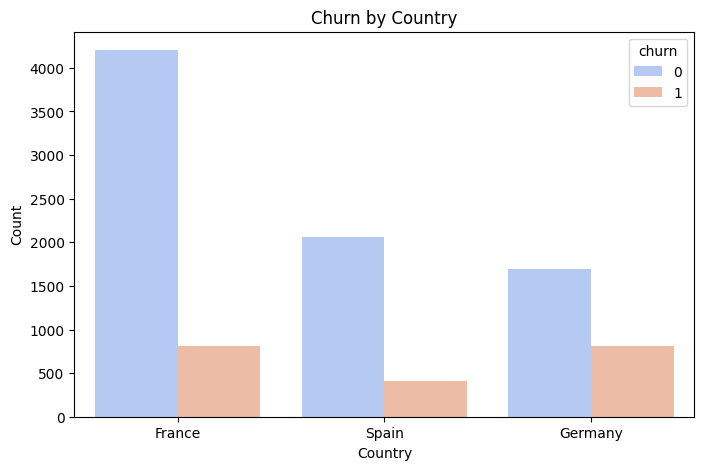

In [13]:
#Churn by country
plt.figure(figsize=(8, 5))
sns.countplot(x='country', hue='churn', data=data, palette="coolwarm")
plt.title("Churn by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


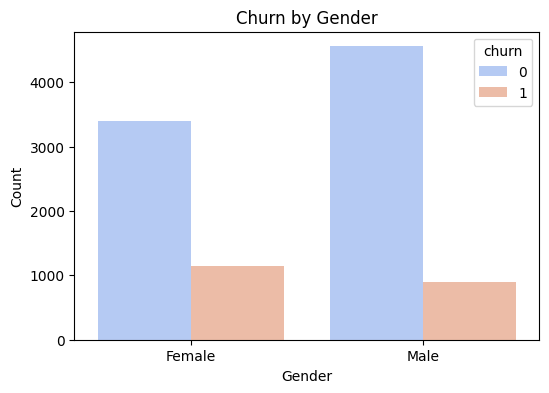

In [16]:
#churn by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='churn', data=data, palette="coolwarm")
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


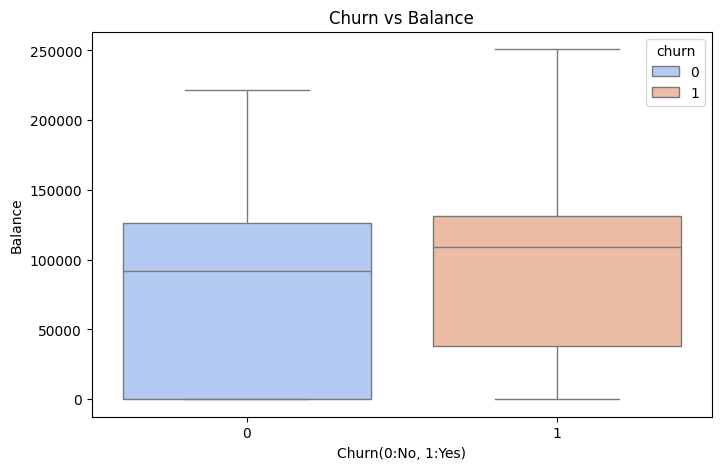

In [18]:
#Churn vs Balance  
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='balance', hue='churn', data=data, palette="coolwarm")
plt.title("Churn vs Balance")
plt.xlabel("Churn(0:No, 1:Yes)")
plt.ylabel("Balance")
plt.show() 

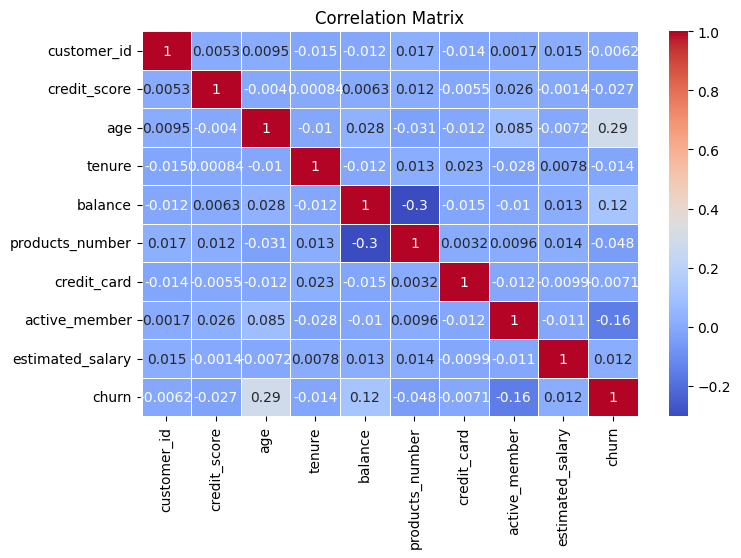

In [19]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [27]:
from scipy.stats import chi2_contingency

for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p:.5f}")

country: p-value = 0.00000
gender: p-value = 0.00000
credit_card: p-value = 0.49237
active_member: p-value = 0.00000
churn: p-value = 0.00000


In [28]:
from scipy.stats import ttest_ind

numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

for col in numerical_features:
    group0 = data[data['churn'] == 0][col]
    group1 = data[data['churn'] == 1][col]
    t_stat, p = ttest_ind(group0, group1)
    print(f"{col}: p-value = {p:.5f}")

credit_score: p-value = 0.00674
age: p-value = 0.00000
tenure: p-value = 0.16153
balance: p-value = 0.00000
estimated_salary: p-value = 0.22644


In [31]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['churn', 'customer_id'])
y = data['churn']

X = pd.get_dummies(X, drop_first=True)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by = 'importance', ascending=False)
print(feature_importances)

             feature  importance
1                age    0.237116
7   estimated_salary    0.147870
0       credit_score    0.144896
3            balance    0.142249
4    products_number    0.130435
2             tenure    0.081775
6      active_member    0.039826
8    country_Germany    0.026906
5        credit_card    0.018294
10       gender_Male    0.017851
9      country_Spain    0.012783


In [34]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_scaled, y)

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_scaled, y)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'balance', 'active_member', 'country_Germany', 'gender_Male'], dtype='object')


In [35]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='mi_score', ascending=False)
print(mi_scores_df)

             feature  mi_score
4    products_number  0.066204
1                age  0.064063
8    country_Germany  0.016498
6      active_member  0.012267
10       gender_Male  0.008934
3            balance  0.007791
0       credit_score  0.006925
7   estimated_salary  0.002709
5        credit_card  0.001595
9      country_Spain  0.001360
2             tenure  0.000000


In [60]:
data = pd.read_csv("/Users/surajmathapati/Prep/Customer_churn_prediction/data/Bank Customer Churn Prediction.csv")

data.head()

columns_to_drop = ['credit_card', 'tenure']

final_data = data.drop(columns=columns_to_drop)

final_data = data[data['country'] != 'Spain']

final_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


In [61]:
final_data = pd.get_dummies(final_data,columns=['country', 'gender'], drop_first=True)
final_data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False
6,15592531,822,50,7,0.00,2,1,1,10062.80,0,False,True
7,15656148,376,29,4,115046.74,4,1,0,119346.88,1,True,False


In [62]:
final_data.head()
final_data.to_csv("final_data.csv", index=False)